In [1]:
library(ggplot2)
library(hexbin)

In [2]:
df = read.csv('../data/seattle_911_clean.csv')

In [3]:
head(df)

X,Address,Type,Latitude,Longitude,Timestamp,Date,Time
1,6900 37th Av S,Medic Response,47.54068,-122.2861,2011-11-09 23:33:00,2011-11-09,23:33:00
2,N 50th St / Stone Way N,Aid Response,47.66503,-122.3402,2011-11-09 23:32:00,2011-11-09,23:32:00
3,E John St / E Olive Way,Aid Response,47.61957,-122.3243,2011-11-09 23:32:00,2011-11-09,23:32:00
4,611 12th Av S,Aid Response,47.59741,-122.3172,2011-11-09 23:29:00,2011-11-09,23:29:00
5,4545 42nd Av Sw,Automatic Medical Alarm,47.56247,-122.3855,2011-11-09 23:25:00,2011-11-09,23:25:00
6,2124 3rd Av,Investigate Out Of Service,47.61335,-122.3425,2011-11-09 23:17:00,2011-11-09,23:17:00


In [4]:
df$Timestamp <- as.POSIXct(df$Timestamp)
df$Date <- as.Date(df$Timestamp)
df$Time <- format(df$Timestamp,"%H:%M:%S")
sapply(df, typeof)

X     Address        Type    Latitude   Longitude   Timestamp 
  "integer"   "integer"   "integer"    "double"    "double"    "double" 
       Date        Time 
   "double" "character"

In [5]:
head(df)

X,Address,Type,Latitude,Longitude,Timestamp,Date,Time
1,6900 37th Av S,Medic Response,47.54068,-122.2861,2011-11-09 23:33:00,2011-11-10,23:33:00
2,N 50th St / Stone Way N,Aid Response,47.66503,-122.3402,2011-11-09 23:32:00,2011-11-10,23:32:00
3,E John St / E Olive Way,Aid Response,47.61957,-122.3243,2011-11-09 23:32:00,2011-11-10,23:32:00
4,611 12th Av S,Aid Response,47.59741,-122.3172,2011-11-09 23:29:00,2011-11-10,23:29:00
5,4545 42nd Av Sw,Automatic Medical Alarm,47.56247,-122.3855,2011-11-09 23:25:00,2011-11-10,23:25:00
6,2124 3rd Av,Investigate Out Of Service,47.61335,-122.3425,2011-11-09 23:17:00,2011-11-10,23:17:00


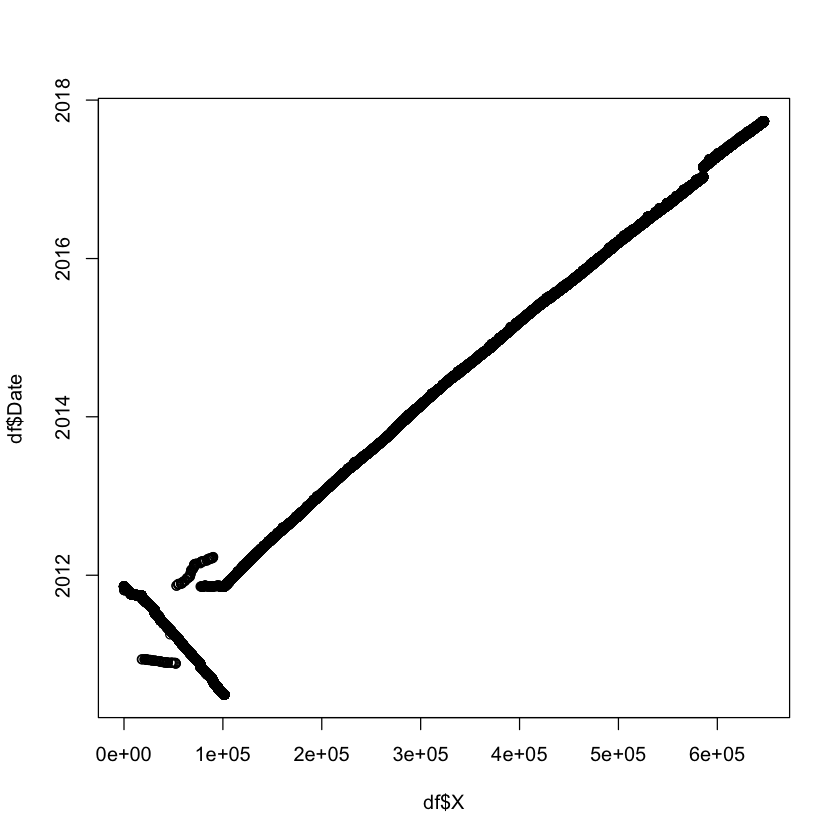

In [6]:
plot(x = df$X, y = df$Date)

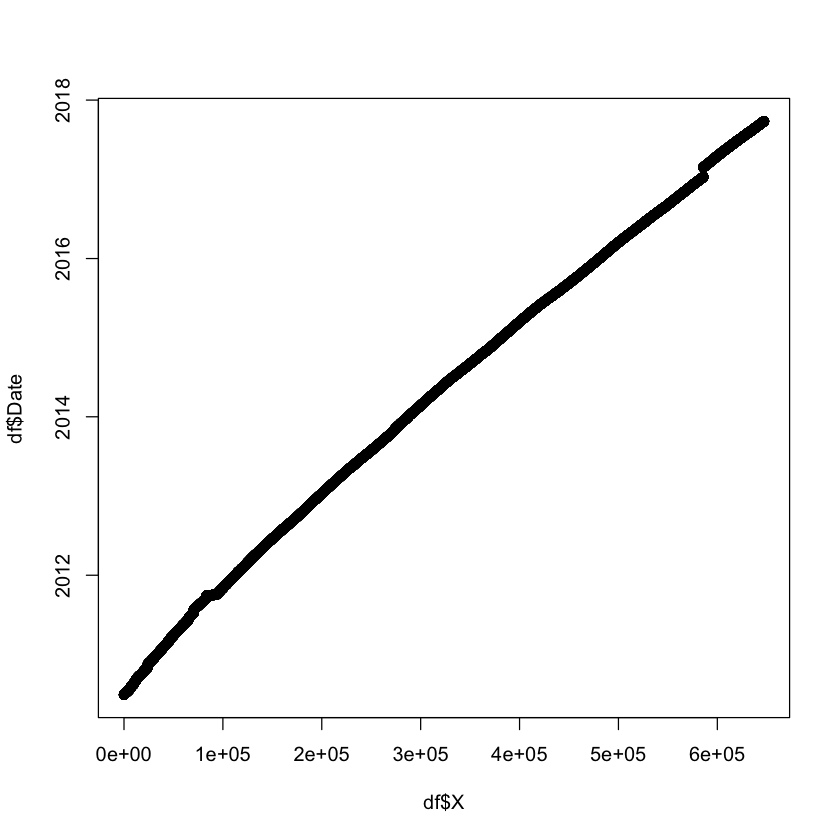

In [7]:
# sort by Timestamp
df <- df[order(df$Timestamp),]
df$X <- seq(length=nrow(df))
plot(x = df$X, y = df$Date)

Warning message:
“Removed 101 rows containing missing values (geom_point).”

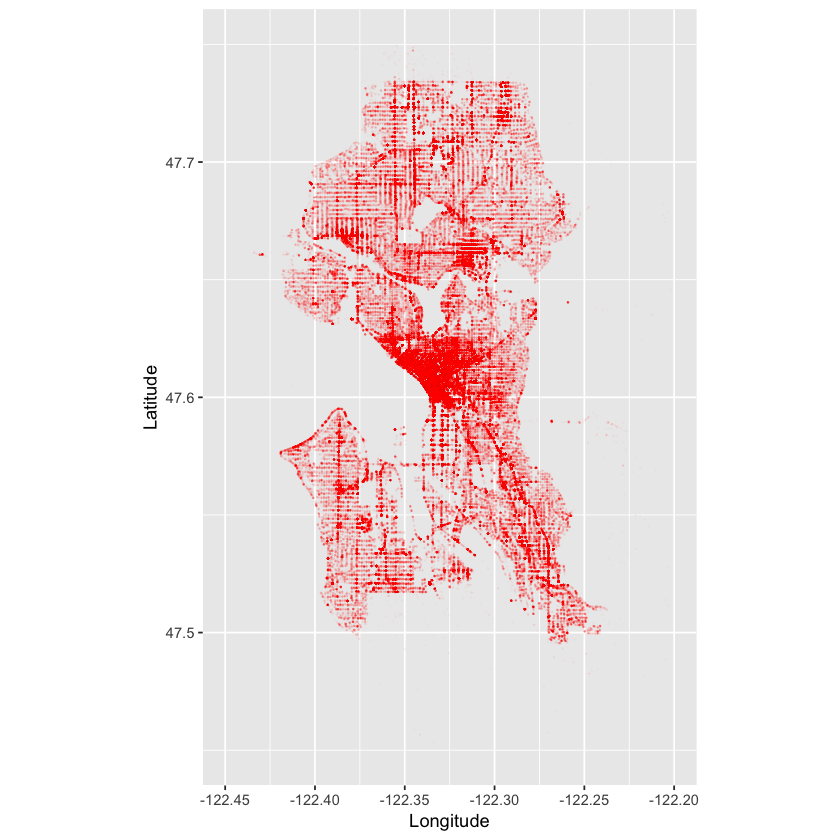

In [8]:
ggplot(df, aes(x=Longitude, y=Latitude)) +
geom_point(alpha=0.02, size=0.1, color='red') +
xlim(-122.45, -122.2) +
ylim(47.45, 47.75) +
coord_fixed(ratio=1.31) # set correct proportions

Warning message:
“Removed 101 rows containing non-finite values (stat_binhex).”

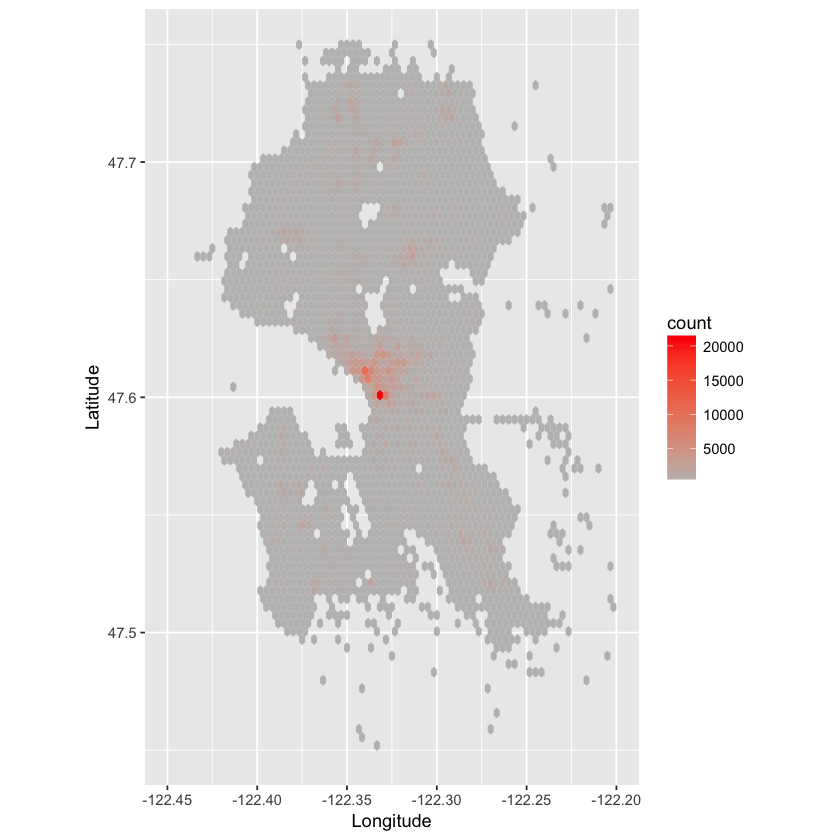

In [9]:
ggplot(df, aes(x=Longitude, y=Latitude)) +
geom_hex(bins=75) +
xlim(-122.45, -122.2) +
ylim(47.45, 47.75) +
scale_fill_gradient(low = 'grey', high = 'red') +
coord_fixed(ratio=1.31) # set correct proportions

Warning message:
“Removed 101 rows containing non-finite values (stat_binhex).”

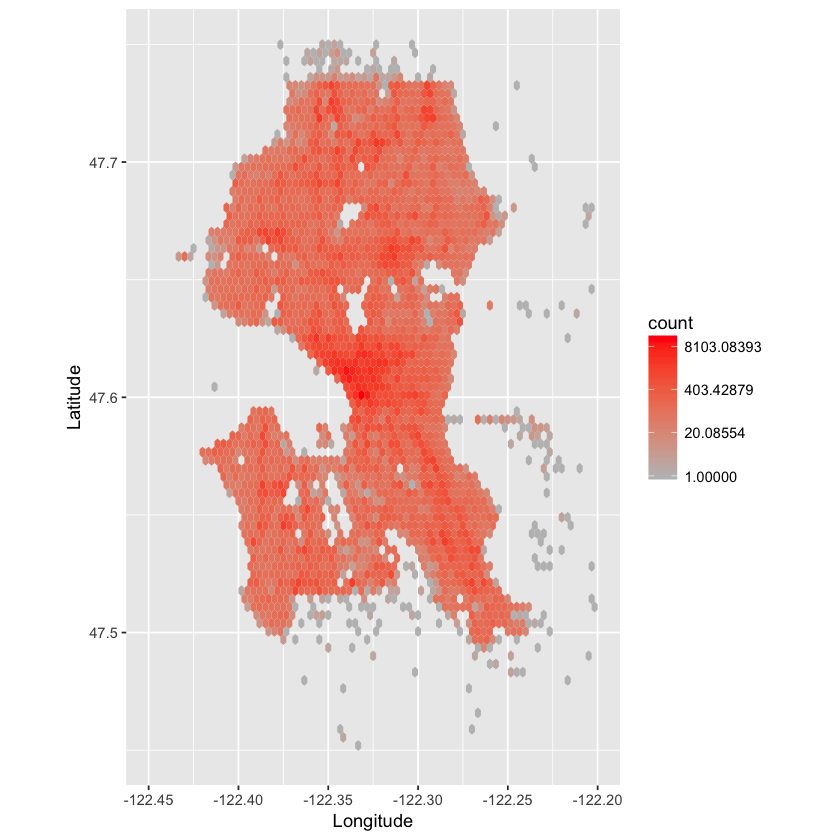

In [10]:
ggplot(df, aes(x=Longitude, y=Latitude)) +
geom_hex(bins=75) +
xlim(-122.45, -122.2) +
ylim(47.45, 47.75) +
coord_fixed(ratio=1.31) +  # set correct proportions
scale_fill_continuous(trans='log', low = 'grey', high = 'red')